## What's Cooking? 
Use recipe ingredients to categorize the cuisine

### Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
sb.set()

### Extract dataset
Extract train.json from zipfile and peek using `head` function

In [16]:
train_file = zipfile.ZipFile('train.json.zip', 'r')
train_data = pd.read_json(train_file.read('train.json'))
train_data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


`id` is read as integers. <br>
`cuisine` and `ingredients` are read as objects.<br>
The columns with object dtype are the possible categorical features in your dataset.

Filter Categorical data

In [18]:
cat_train_data = train_data.select_dtypes(include=['object']).copy()
cat_train_data.head()

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."


check for null values in the dataset

In [19]:
print(cat_train_data.isnull().values.sum())

0


Another Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts()`

In [21]:
print(cat_train_data['cuisine'].value_counts())

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


C:\Users\lrazerblade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


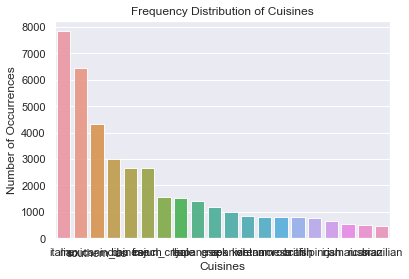

<Figure size 1152x576 with 0 Axes>

In [46]:
cuisine_count = cat_train_data['cuisine'].value_counts()
sb.set(style="darkgrid")
sb.barplot(cuisine_count.index, cuisine_count.values, alpha=0.9)
plt.title('Frequency Distribution of Cuisines')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cuisines', fontsize=12)
plt.figure(figsize=(16,8))
plt.show()

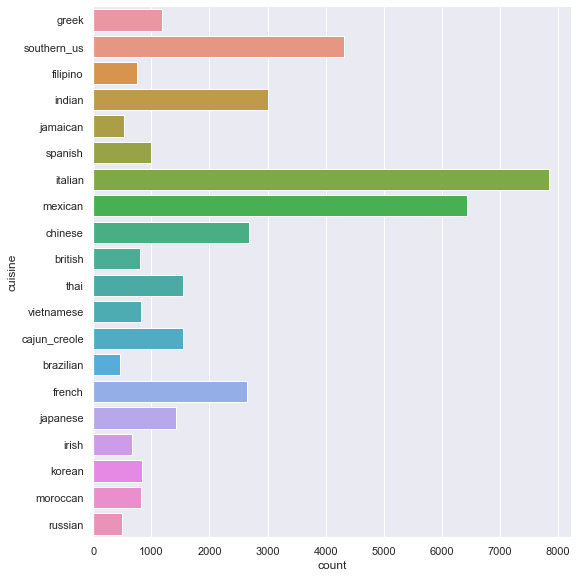

In [51]:
sb.catplot(y='cuisine', data = cat_train_data, kind = 'count', height = 8)